In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
df = pd.read_csv('shopping_behavior.csv')
print("Форма данных:", df.shape)

Форма данных: (3900, 18)


In [5]:
# 1. Первые/последние строки
print("Первые 5 строк:")
print(df.head())
print("Последние 5 строк:")
print(df.tail())

Первые 5 строк:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo 

In [6]:
# 2. Структура данных
print("Информация о данных:")
print(df.info())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used    

In [7]:
# 3. Типы данных
print("Типы данных:")
print(df.dtypes)

Типы данных:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [8]:
# --- 1. Пропущенные значения ---
print(" ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print("Количество пропусков по столбцам:")
print(df.isnull().sum())

 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
Количество пропусков по столбцам:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [9]:
# --- 2. Дубликаты ---
print("ДУБЛИКАТЫ:")
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены")

ДУБЛИКАТЫ:
Количество полных дубликатов строк: 0


In [11]:
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА:")
print(df.describe(include='all').round(2))

print("УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"  {col}: {unique_count} уникальных значений")

print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ (числовые столбцы):")
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print(corr_matrix.round(3))

ОПИСАТЕЛЬНАЯ СТАТИСТИКА:
        Customer ID      Age Gender Item Purchased  Category  \
count       3900.00  3900.00   3900           3900      3900   
unique          NaN      NaN      2             25         4   
top             NaN      NaN   Male         Blouse  Clothing   
freq            NaN      NaN   2652            171      1737   
mean        1950.50    44.07    NaN            NaN       NaN   
std         1125.98    15.21    NaN            NaN       NaN   
min            1.00    18.00    NaN            NaN       NaN   
25%          975.75    31.00    NaN            NaN       NaN   
50%         1950.50    44.00    NaN            NaN       NaN   
75%         2925.25    57.00    NaN            NaN       NaN   
max         3900.00    70.00    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count                 3900.00     3900  3900   3900    3900        3900.00   
unique                    NaN       50     4     2

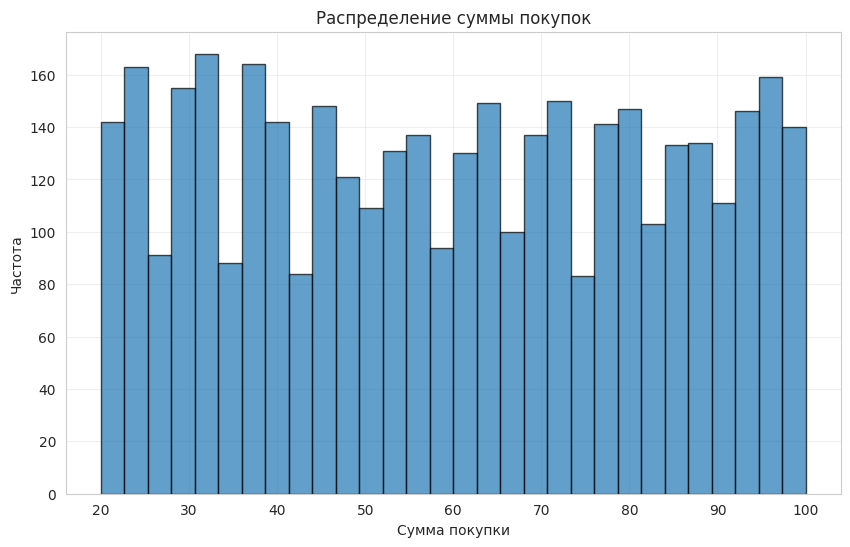

In [12]:
# 1. Гистограмма распределения покупок
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase Amount (USD)'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение суммы покупок')
plt.xlabel('Сумма покупки')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

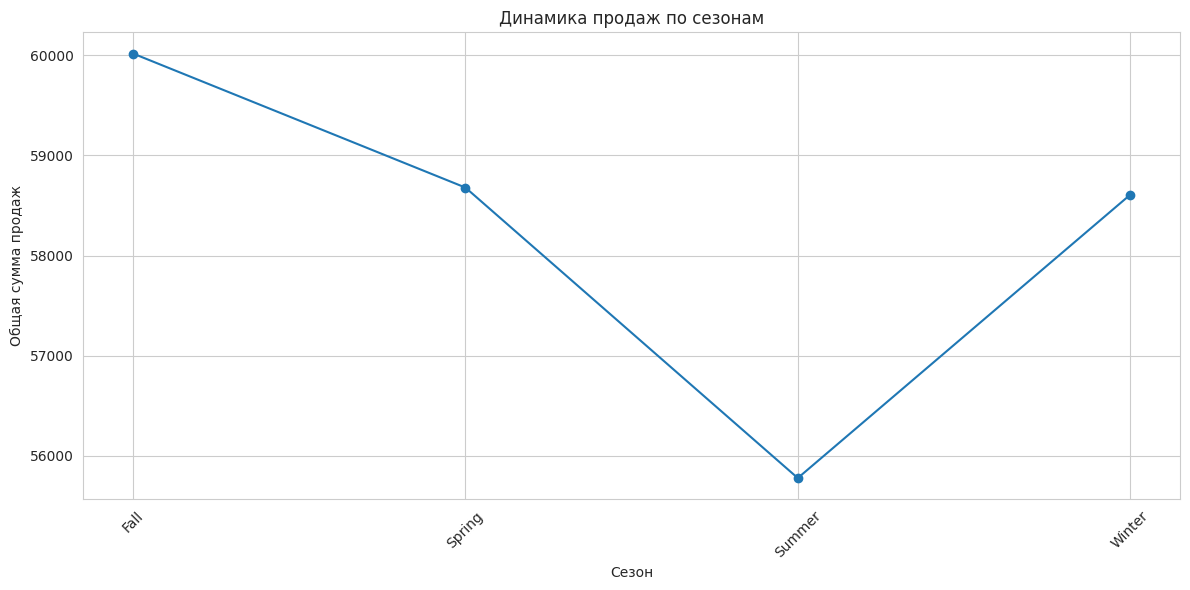

In [ ]:
# 2. Линейный график
df_time = df.groupby(df['Season'])['Purchase Amount (USD)'].sum()
plt.figure(figsize=(12, 6))
plt.plot(df_time.index, df_time.values, marker='o')
plt.title('Динамика продаж по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Общая сумма продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

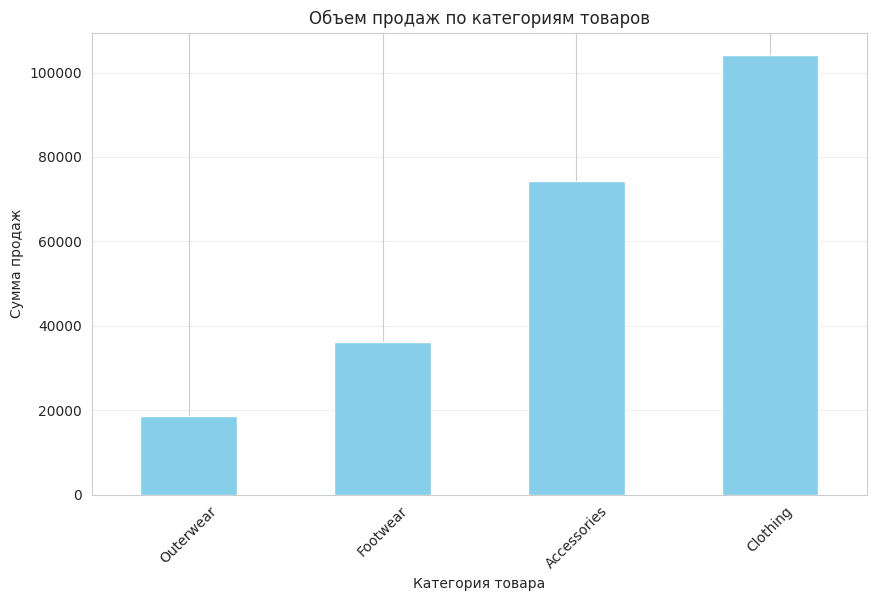

In [ ]:
# 3. Столбчатая диаграмма (продажи по категориям)
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values()
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Объем продаж по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 800x600 with 0 Axes>

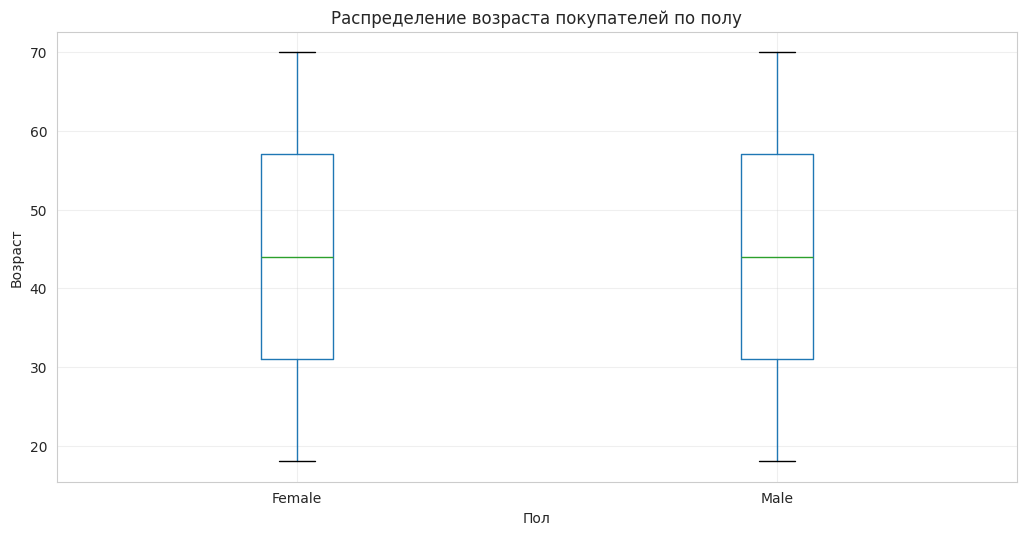

In [ ]:
# 4. Boxplot (возраст по полу)
plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Gender', grid=False)
plt.title('Распределение возраста покупателей по полу')
plt.suptitle('')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.grid(True, alpha=0.3)
plt.show()

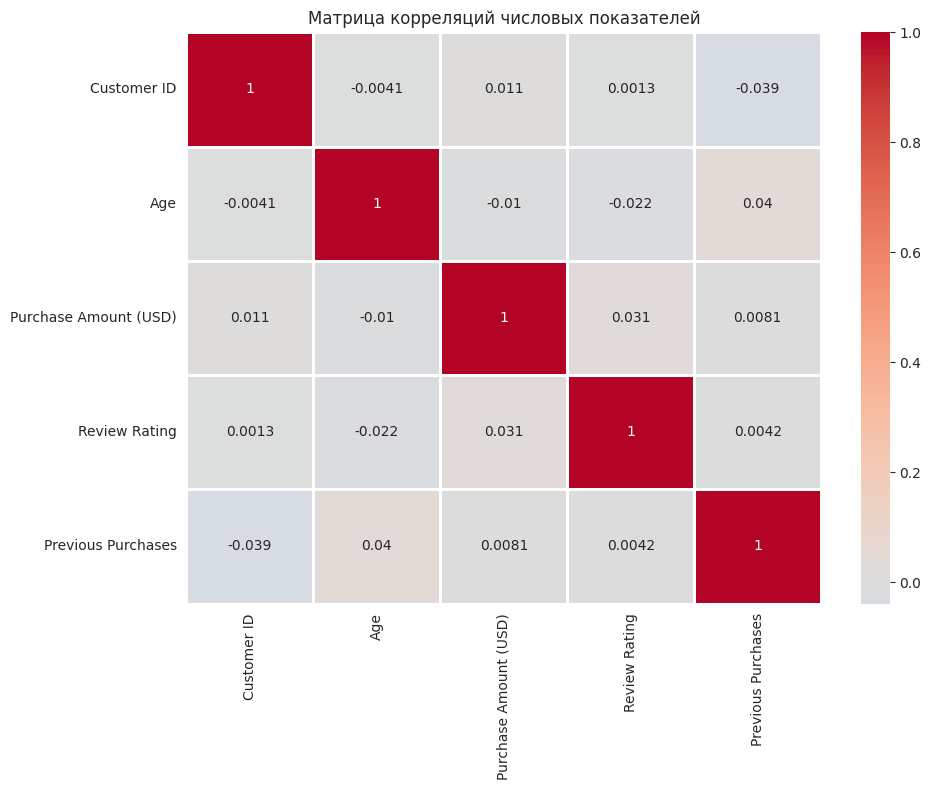

In [ ]:
# 5. Heatmap корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Матрица корреляций числовых показателей')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Среднее по группам
print("1. Средний чек по категориям товаров:")
group1 = df.groupby('Category')['Purchase Amount (USD)'].mean().round(2)
print(group1)


1. Средний чек по категориям товаров:
Category
Accessories    59.84
Clothing       60.03
Footwear       60.26
Outerwear      57.17
Name: Purchase Amount (USD), dtype: float64


In [ ]:
# 2. Количество покупок по методу оплаты
print("\n2. Количество транзакций по методу оплаты:")
group2 = df.groupby('Payment Method').size()
print(group2)



2. Количество транзакций по методу оплаты:
Payment Method
Bank Transfer    612
Cash             670
Credit Card      671
Debit Card       636
PayPal           677
Venmo            634
dtype: int64


In [13]:
# 4. Сводная таблица (pivot_table)
print("\n4. Сводная таблица: средний чек по полу и категории:")
pivot = pd.pivot_table(df,
                       values='Purchase Amount (USD)',
                       index='Category',
                       columns='Gender',
                       aggfunc='mean',
                       fill_value=0).round(2)
print(pivot)


4. Сводная таблица: средний чек по полу и категории:
Gender       Female   Male
Category                  
Accessories   60.76  59.41
Clothing      60.50  59.80
Footwear      59.47  60.64
Outerwear     58.43  56.61


In [14]:
df.to_csv('customer_behavior_processed.csv', index=False, encoding='utf-8')